In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm 
# Import the MarkovChain class from markovchain.py
from markovian import MarkovChain

# Import data

Chargement des corrdonnées de la vache

In [2]:
X_shoulder = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  header=None)
X_shoulder


,0,1,2,3
0,0.166457,0.008873,1.001398,1.048313
1,0.168241,0.015035,0.992619,1.041969
2,0.169740,0.020408,0.984892,1.036530
3,0.170978,0.025045,0.978149,1.031934
4,0.171978,0.028997,0.972324,1.028118
...,...,...,...,...
1370,0.236992,0.083251,0.545055,1.410483
1371,0.220609,0.078841,0.564080,1.413386
1372,0.202257,0.074052,0.587869,1.416906
1373,0.181830,0.068883,0.616711,1.421086


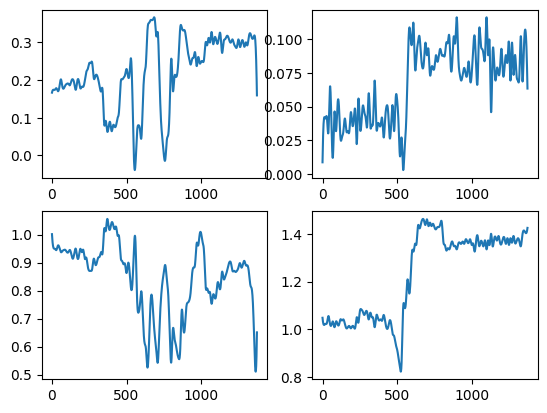

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_shoulder)) , X_shoulder[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[3])


# Train model

In [9]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full",
                               n_iter=50)
        model.fit(X_shoulder)
        models.append(model)
        scores.append(model.score(X_shoulder))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_shoulder)

Model is not converging.  Current: 9773.016806479765 is not greater than 9773.302834312777. Delta is -0.28602783301175805
Model is not converging.  Current: 9773.009862899618 is not greater than 9773.293276539527. Delta is -0.28341363990875834
Model is not converging.  Current: 9773.228192278693 is not greater than 9773.43793237859. Delta is -0.20974009989731712
Model is not converging.  Current: 9773.127380090818 is not greater than 9773.42005024617. Delta is -0.29267015535151586
Model is not converging.  Current: 9772.631640545298 is not greater than 9772.66916209679. Delta is -0.037521551492318395
Model is not converging.  Current: 10856.622669469825 is not greater than 10856.83395074929. Delta is -0.2112812794639467
Model is not converging.  Current: 10856.43802689718 is not greater than 10856.517620628041. Delta is -0.07959373086123378
Model is not converging.  Current: 11085.656459952615 is not greater than 11085.85148284529. Delta is -0.19502289267438755
Model is not converging.

The best model had a score of 12419.494621219505 and 4 components


estimated mean and covar of each state

In [15]:
print(f"Moyennes :\n{model.means_}")
print(f"Covariance :\n{model.covars_}")
print(f"Transmission matrice :\n{model.transmat_}")
print(f"Probabilite initiale :\n{model.startprob_}")
# print(f"Convergence :\n{model.monitor_}")

Moyennes :
[[0.063 0.075 0.807 1.3  ]
 [0.175 0.039 0.941 1.019]
 [0.279 0.089 0.64  1.399]
 [0.296 0.084 0.848 1.367]]
Covariance :
[[[ 0.004  0.    -0.004 -0.   ]
  [ 0.     0.001 -0.002  0.003]
  [-0.004 -0.002  0.008 -0.004]
  [-0.     0.003 -0.004  0.021]]

 [[ 0.003 -0.    -0.002 -0.001]
  [-0.     0.     0.     0.   ]
  [-0.002  0.     0.003  0.001]
  [-0.001  0.     0.001  0.002]]

 [[ 0.003  0.     0.001  0.002]
  [ 0.     0.    -0.001  0.   ]
  [ 0.001 -0.001  0.007  0.   ]
  [ 0.002  0.     0.     0.002]]

 [[ 0.001  0.    -0.002  0.   ]
  [ 0.     0.    -0.    -0.   ]
  [-0.002 -0.     0.006  0.   ]
  [ 0.    -0.     0.     0.   ]]]
Transmission matrice :
[[0.987 0.    0.013 0.   ]
 [0.002 0.998 0.    0.   ]
 [0.004 0.    0.987 0.009]
 [0.    0.    0.004 0.996]]
Probabilite initiale :
[0. 1. 0. 0.]
Convergence :
ConvergenceMonitor(
    history=[6552.720277738053, 10108.130144754052, 11204.797143369042, 11498.228762746106, 11816.977394509984, 12009.72945984408, 12187.3266194

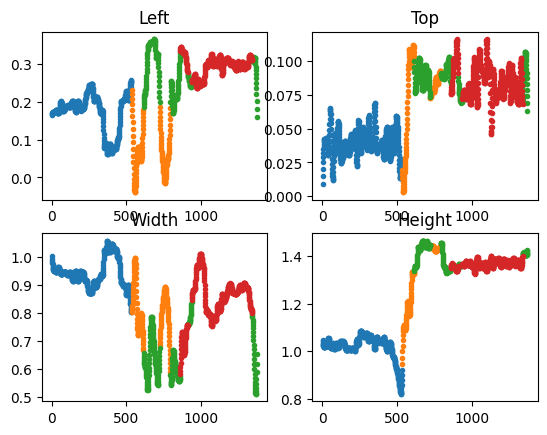

In [11]:
states= pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[0][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[1][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[2][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[3][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")


[[0.987 0.    0.013 0.   ]
 [0.002 0.998 0.    0.   ]
 [0.004 0.    0.987 0.009]
 [0.    0.    0.004 0.996]]
[1 0 2 3]


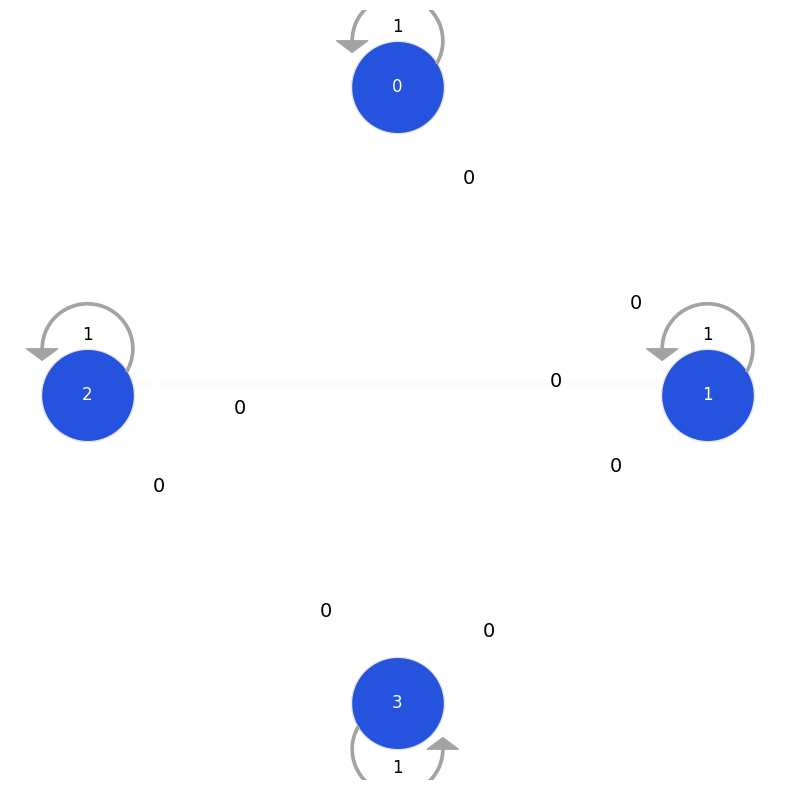

In [12]:



P = np.array(model.transmat_) # Transition matrix
print(P)
# print(model.transmat_)
print(states)
mc = MarkovChain(P, states)
mc.draw()

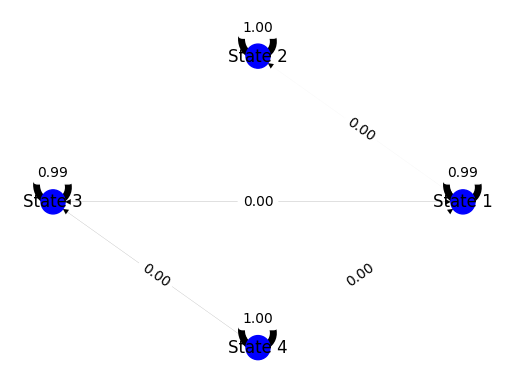

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def visualize_hmm(transition_matrix, observations):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for hidden states
    num_states = transition_matrix.shape[0]
    hidden_states = [f'State {i+1}' for i in range(num_states)]
    G.add_nodes_from(hidden_states, color='blue')

    # Add edges with transition probabilities
    for i in range(num_states):
        for j in range(num_states):
            prob = transition_matrix[i, j]
            if prob > 0:
                G.add_edge(hidden_states[i], hidden_states[j], weight=prob, label=f'{prob:.2f}')

    # Set node positions
    pos = nx.circular_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=[node[1]['color'] for node in G.nodes(data=True)])

    # Draw edges
    edges = G.edges(data=True)
    edge_labels = {(edge[0], edge[1]): edge[2]['label'] for edge in edges}
    nx.draw_networkx_edges(G, pos, width=[edge[2]['weight']*5 for edge in edges])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Draw labels
    nx.draw_networkx_labels(G, pos)

    # Show the plot
    plt.axis('off')
    plt.show()

hidden_states = states
observations = {'mean': np.array(model.means_), 'covariance': np.array(model.covars_)}
transition_matrix = model.transmat_

visualize_hmm(transition_matrix, observations)


In [14]:
df=pd.DataFrame({'states':Z})
# make the same thing for the others 
df.to_csv("E:/UQAM/Recherche/Thomas/data/cow_coords_hmmstates.csv")